# Prueba Intertrimestral

**Nombre: Arturo**  
**Apellidos: Fernández García**

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [84]:
import numpy as np                          
import pandas as pd                         
import matplotlib.pyplot as plt             
import seaborn as sns                       
from pathlib import Path                    
import joblib                               

from sklearn.preprocessing import (
    StandardScaler,                         
    OneHotEncoder                           
)
from sklearn.impute import SimpleImputer     
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline        


from sklearn.model_selection import (
    train_test_split,                       
    cross_val_score,                        
    KFold, StratifiedKFold,                 
    GridSearchCV                            
)



# Regresión lineal y regularizada
from sklearn.linear_model import (
    LinearRegression,                       
    Ridge,                                  
    Lasso,                                  
    LogisticRegression                      
)

# Modelos basados en árboles y conjuntos
from sklearn.ensemble import (
    RandomForestRegressor,                  
    RandomForestClassifier,                 
    GradientBoostingRegressor,              
    GradientBoostingClassifier              
)

# Modelos basados en distancias y márgenes
from sklearn.svm import SVC, SVR            
from sklearn.neighbors import (
    KNeighborsClassifier,                   
    KNeighborsRegressor                     
)


from sklearn.metrics import (
    # Clasificación
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score,

    # Regresión
    mean_absolute_error, mean_squared_error, r2_score,

    # Otras métricas útiles
    silhouette_score                         
)


from sklearn.decomposition import PCA        
from sklearn.cluster import (
    KMeans, DBSCAN, AgglomerativeClustering  
)


import warnings
warnings.filterwarnings("ignore")            

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [85]:
#Altura en metros (poner decimales), peso en kg
def imc(weight, height):
    return round(weight / (height ** 2), 2)


In [86]:
imc_Arturo = imc(80, 1.80)
print(imc_Arturo)

24.69


b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [87]:
def saludable(imcValue):
    if imcValue < 18.5:
        return "Bajo peso"
    elif 18.5 <= imcValue <= 24.9:
        return "Saludable"
    else:
        return "Sobrepeso"

In [88]:
#Ejemplo
saludable_Arturo = saludable(imc_Arturo)
print(saludable_Arturo)

Saludable


c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [89]:
#Ponemos valores entre 50 y 100kg y altura entre 1.5 y 2 metros
np.random.seed(42)  
peso = np.random.uniform(50, 100, 10)
altura = np.random.uniform(1.5, 2.0, 10)

In [90]:
imc_vals = [imc(w, h) for w, h in zip(peso, altura)]
categoria = [saludable(i) for i in imc_vals]

imcData = pd.DataFrame({
    "peso": peso,
    "altura": altura,
    "imc": imc_vals,
    "categoria": categoria
})

In [91]:
print(imcData.head())
print("\nTipos de datos:\n", imcData.dtypes)

        peso    altura    imc  categoria
0  68.727006  1.510292  30.13  Sobrepeso
1  97.535715  1.984955  24.75  Saludable
2  86.599697  1.916221  23.58  Saludable
3  79.932924  1.606170  30.98  Sobrepeso
4  57.800932  1.590912  22.84  Saludable

Tipos de datos:
 peso         float64
altura       float64
imc          float64
categoria     object
dtype: object


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [92]:
class HealthTools:
    #Calculo IMC
    def imc(self, weight, height):
        return round(weight / (height ** 2), 2)

    #Saludable clasificacion
    def saludable(self, imcValue):
        if imcValue < 18.5:
            return "Bajo peso"
        elif 18.5 <= imcValue <= 24.9:
            return "Saludable"
        else:
            return "Sobrepeso"

    #Dataframe
    def generar_dataframe(self, pesos, alturas):
        imc_vals = [self.imc(w, h) for w, h in zip(pesos, alturas)]
        categorias = [self.saludable(i) for i in imc_vals]

        data = pd.DataFrame({
            "peso": pesos,
            "altura": alturas,
            "imc": imc_vals,
            "categoria": categorias
        })
        return data

## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [93]:
lifeStyleData = pd.read_csv("Final_data.csv")
print(lifeStyleData.head())               
print("Número de filas y columnas:")
print(lifeStyleData.shape)   


     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   
1     

b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [94]:
def describeData(dataFrame):
    info = pd.DataFrame({
        "Tipo": dataFrame.dtypes,
        "NAs": dataFrame.isnull().sum(),
        "Porcentaje nulos (%)": round((dataFrame.isnull().sum() / len(dataFrame)) * 100, 2)
    })
    return info


c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [95]:
lifeStyleData.isnull().sum().sum()

3

In [96]:
describeData(lifeStyleData)

,Tipo,NAs,Porcentaje nulos (%)
Age,float64,0,0.0
Gender,object,0,0.0
Weight (kg),float64,0,0.0
Height (m),float64,0,0.0
Max_BPM,float64,1,0.0
Avg_BPM,float64,1,0.0
Resting_BPM,float64,0,0.0
Session_Duration (hours),float64,0,0.0
Calories_Burned,float64,0,0.0
Workout_Type,object,0,0.0


Las variables con más valores faltantes son: Max_BPM, Avg_BPM, cholesterol_mg, con tan solo uno faltante cada uno de ellos. Comrpobamos la informacion con el comando ejecutando anteriormente, lifeStyleData.isnull().sum().sum(), y efectivamente tan solo hay 3 en total. 

Para las dos primeras variables será porque no hay informacion sobre BPM de esos usuarios, y por lo tanto no lo hay de la media ni del maximo

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

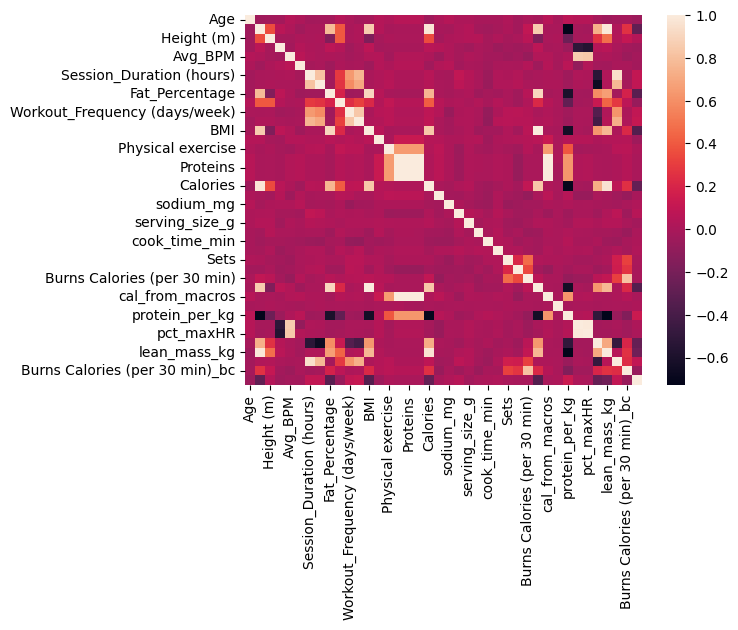

In [97]:
sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.show() 

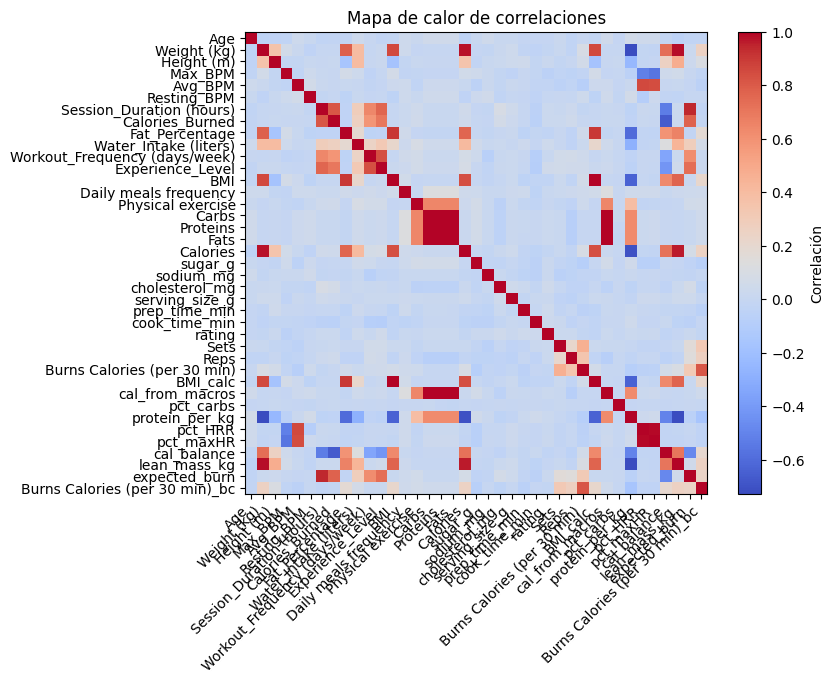

In [98]:
correlaciones = lifeStyleData.corr(numeric_only=True) 
plt.figure(figsize=(8,6))
plt.imshow(correlaciones, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlación')
plt.xticks(range(len(correlaciones.columns)), correlaciones.columns, rotation=45, ha='right')
plt.yticks(range(len(correlaciones.columns)), correlaciones.columns)
plt.title("Mapa de calor de correlaciones")
plt.show()

In [99]:
corr_pairs = correlaciones.unstack()

corr_pairs = corr_pairs.drop_duplicates().reset_index()
corr_pairs.columns = ['Variable_1', 'Variable_2', 'Correlacion']
corr_filtradas = corr_pairs[(corr_pairs['Correlacion'] > 0.5) | (corr_pairs['Correlacion'] < -0.5)]
corr_ordenadas = corr_filtradas.sort_values(by='Correlacion', ascending=False).reset_index(drop=True)

#Quitamos las correlaciones absolutas entre las mismas variables
for index, element in corr_ordenadas.iterrows():
    if element["Variable_1"] == element["Variable_2"]:
        corr_ordenadas.drop(index, inplace=True)

print(corr_ordenadas)

                       Variable_1                      Variable_2  Correlacion
1                             BMI                        BMI_calc     1.000000
2                           Carbs                 cal_from_macros     0.999924
3                            Fats                 cal_from_macros     0.999848
4                        Proteins                 cal_from_macros     0.999803
5                        Proteins                            Fats     0.999608
6                           Carbs                            Fats     0.999605
7                           Carbs                        Proteins     0.999595
8                         pct_HRR                       pct_maxHR     0.988485
9                     Weight (kg)                    lean_mass_kg     0.981897
10                    Weight (kg)                        Calories     0.978273
11                       Calories                    lean_mass_kg     0.962934
12       Session_Duration (hours)                   

### Vemos fuertes correlaciones, tanto de manera directa como inversa. Suelen ser variables sobre distintas macros, pesos totales con pesos segun tipo de masa, calorias con pesos... Tiene sentido. 


## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [100]:
targetVar = "BMI"
predictors = ["Carbs", "Fats", "Proteins"]

X = lifeStyleData[predictors]
y = lifeStyleData[targetVar]

print(X.head())
print(y.head())

    Carbs   Fats  Proteins
0  267.68  71.63    106.05
1  214.32  56.97     85.41
2  246.04  65.48     98.11
3  203.22  54.56     80.84
4  332.79  88.43    133.05
0    24.87
1    23.48
2    21.15
3    32.45
4    14.83
Name: BMI, dtype: float64


b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (14000, 3)
Tamaño de prueba: (6000, 3)


c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [102]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Regresión Lineal:")
print("R²:", round(r2_lr, 3))
print("MSE:", round(mse_lr, 3))


Regresión Lineal:
R²: -0.0
MSE: 45.743


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [103]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("\nRandom Forest:")
print("R²:", round(r2_rf, 3))
print("MSE:", round(mse_rf, 3))




Random Forest:
R²: 0.01
MSE: 45.268


Parece que el random forest tiene mejor rendimiento ya que el MSE es menor en el randomforest (menos error), y el R^2 mayor, por lo que la variable BMI está mejor explicada

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [150]:
df = lifeStyleData.copy()  # opcional, por seguridad
df["bmiHealthy"] = ((df["BMI"] >= 18.5) & (df["BMI"] <= 24.9)).astype(int)

b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [151]:
df = df.dropna()
df = df[df["bmiHealthy"].notna()]

In [152]:
X = df.drop(columns=["bmiHealthy", "Weight (kg)", "Height (m)", "BMI", "BMI_calc"])      
y = df["bmiHealthy"]  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if len(y.unique()) < 10 else None)

In [153]:
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns 
print(num_cols)
print(cat_cols)

Index(['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
       'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'sugar_g', 'sodium_mg', 'cholesterol_mg',
       'serving_size_g', 'prep_time_min', 'cook_time_min', 'rating', 'Sets',
       'Reps', 'Burns Calories (per 30 min)', 'cal_from_macros', 'pct_carbs',
       'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg',
       'expected_burn', 'Burns Calories (per 30 min)_bc'],
      dtype='object')
Index(['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type',
       'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'Burns_Calories_Bin'],
      dtype='object')


In [154]:
#Escalado y codificación automática
prepro = ColumnTransformer(transformers=[("num", StandardScaler(), num_cols),
                                        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)])
 # Pipeline: preprocesado + modelo
modelo = Pipeline(steps=[("preprocesado", prepro),
                         ("clasificador", LogisticRegression(max_iter=1000))])
modelo.fit(X_train, y_train)     
pred = modelo.predict(X_test)    

c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


Accuracy: 0.7095
Precision: 0.6908727332792941
Recall: 0.685057149432748
F1: 0.6873802790225172


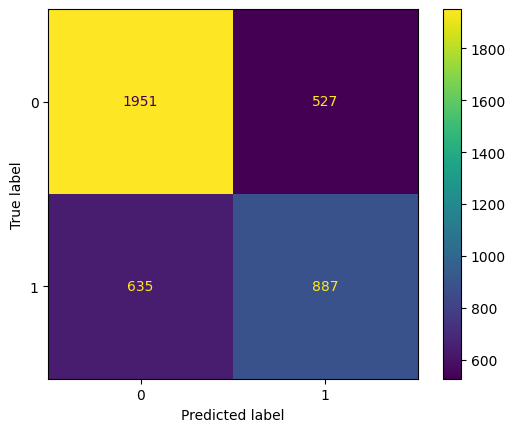

In [155]:
print("Accuracy:", accuracy_score(y_test, pred))       
# Proporción de aciertos
print("Precision:", precision_score(y_test, pred, average="macro"))  # Precisión media
print("Recall:", recall_score(y_test, pred, average="macro"))        
print("F1:", f1_score(y_test, pred, average="macro"))               
# Sensibilidad media
 # Media armónica
ConfusionMatrixDisplay.from_predictions(y_test, pred)  # Matriz de confusión
plt.show()

El modelo parece predecir bastante bien la variable  

d) (0.75 pts) Explica qué variable parece influir más según el modelo.

num__protein_per_kg                    3.855751
num__lean_mass_kg                      1.709814
num__Fat_Percentage                    1.369039
num__Proteins                          1.119621
num__expected_burn                     0.955251
num__Burns Calories (per 30 min)_bc    0.938934
num__pct_HRR                           0.915842
cat__Burns_Calories_Bin_Very High      0.903113
cat__Burns_Calories_Bin_Low            0.767593
num__Burns Calories (per 30 min)       0.734203
num__Calories                          0.723199
num__Session_Duration (hours)          0.684107
num__cal_from_macros                   0.565600
num__cal_balance                       0.554036
num__Avg_BPM                           0.488362
num__Carbs                             0.448714
num__pct_maxHR                         0.409084
num__Fats                              0.390872
cat__Workout_Type_HIIT                 0.288741
cat__Burns_Calories_Bin_Medium         0.277001
dtype: float64


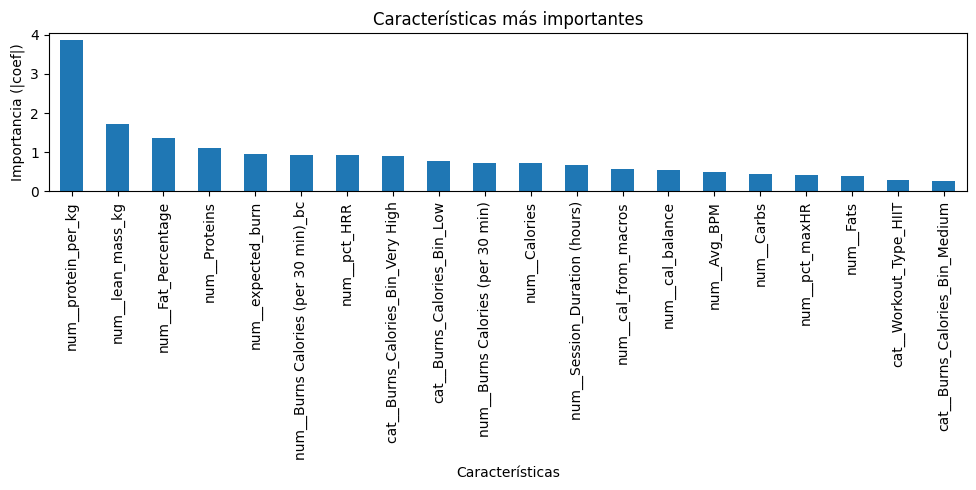

In [ ]:
feature_names = modelo.named_steps["preprocesado"].get_feature_names_out()

coefs = modelo.named_steps["clasificador"].coef_.ravel()

importances = pd.Series(np.abs(coefs), index=feature_names).sort_values(ascending=False)
print(importances.head(20))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
importances.head(20).plot(kind="bar")
plt.title("Características más importantes")
plt.xlabel("Características")
plt.ylabel("Importancia (|coef|)")
plt.tight_layout()
plt.show()

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



## Habitos con mayor relación:
Si asumimos que el estado de salud solo depende del BMI (lo cual es falso, ya que se puede tener un BMI muy alto, siendo una persona con mucho peso debido a la masa muscular, no necesariamente contenido graso), las variables más relacionadas segun los datos son: la ingesta de proteina, la masa magra, y la masa grasa, lo cual tiene sentido.

## El modelo más eficaz

El modelo más eficaz parece ser el random forest, teniendo en cuenta que este no tiene en cuanta todas las variables, y la regresion logistica si. Lo suyo deberia ser meter las mismas variables a ambos para poder compararlos fielmente

## Posibles mejoras
- Para empezar podríamos hacer un preprocesado mucho más exhaustivo de los datos, eliminando variables altamente correladas, comprobando posible desbalanceo de la variable, y otras comprobaciones basicas de los datos.
- Luego podríamos en primer lugar, generar varios modelos, de distintos tipos (tanto para clasificacion como para regresion), y optimizar cada uno de ellos, y luego  compararlos. 
- Tambien podríamos no solo usar datos de test, si no comparar y contrastar contra los de train, para saber si hay sobreajuste por ejemplo. 